In [1]:
from src.epl_proyection.etl import read_clean_geih
from src.epl_proyection.utils import calendar_features

In [5]:
df_calendar = calendar_features.generate_monthly_calendar(start_year = 2001, end_year = 2040)

In [4]:
df_total = read_clean_geih.run_pipeline()

In [7]:
df_to_model = df_calendar.merge(df_total, how = 'left', on = 'YearMonth')

In [8]:
df_to_model

,YearMonth,Year_x,Month_x,workdays,weekends,holidays,Year_y,Month_y,% población en edad de trabajar,Tasa Global de Participación (TGP),...,Construcción,Comercio y reparación de vehículos,Alojamiento y servicios de comida,Transporte y almacenamiento,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,"Actividades profesionales, científicas, técnicas y servicios administrativos","Administración pública y defensa, educación y atención de la salud humana","Actividades artísticas, entretenimiento, recreación y otras actividades de servicios"
0,2001-01-01,2001,1,21,8,2,2001.0,Ene,68.372188,69.053538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-02-01,2001,2,20,8,0,2001.0,Feb,68.400370,68.948903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-03-01,2001,3,21,9,1,2001.0,Mar,68.425957,68.387911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-04-01,2001,4,19,9,4,2001.0,Abr,68.453948,65.224009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-05-01,2001,5,21,8,2,2001.0,May,68.481856,65.406094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2040-08-01,2040,8,21,8,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,2040-09-01,2040,9,20,10,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,2040-10-01,2040,10,22,8,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,2040-11-01,2040,11,20,8,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import pandas as pd
import numpy as np

In [3]:
df_total = read_clean_geih.read_geih_global_data('data/anex-GEIH-feb2025.xlsx')
df_total = read_clean_geih.transform_dataframe_v2(df_total)
df_total = read_clean_geih.process_dataframe_with_year_month(df_total)

In [4]:
df_sector = read_clean_geih.read_geih_sector_data('data/anex-GEIH-feb2025.xlsx')
df_sector = read_clean_geih.transform_dataframe_v2(df_sector)
df_sector = read_clean_geih.process_dataframe_with_year_month(df_sector)

In [10]:
IDCOLS = ['Year', 'Month','MonthNumber', 'YearMonth']
cols_to_correct_total = [x for x in df_total.columns if x not in IDCOLS]
cols_to_correct_sector = [x for x in df_sector.columns if x not in IDCOLS]

In [11]:
df_total = read_clean_geih.columns_to_numeric(df_total, cols_to_correct_total)
df_sector = read_clean_geih.columns_to_numeric(df_sector, cols_to_correct_sector)

In [21]:
df_sector.drop(columns = ['Year','Month','MonthNumber'], inplace = True)
df_sector.columns

Index(['Población ocupada Total nacional', 'No informa',
       'Agricultura, ganadería, caza, silvicultura y pesca',
       'Suministro de electricidad, gas, agua y gestión de desechos^',
       'Industrias manufactureras', 'Construcción',
       'Comercio y reparación de vehículos',
       'Alojamiento y servicios de comida', 'Transporte y almacenamiento',
       'Información y comunicaciones', 'Actividades financieras y de seguros',
       'Actividades inmobiliarias',
       'Actividades profesionales, científicas, técnicas y servicios administrativos',
       'Administración pública y defensa, educación y atención de la salud humana',
       'Actividades artísticas, entretenimiento, recreación y otras actividades de servicios',
       'YearMonth'],
      dtype='object', name='Concepto')

In [22]:
df_joined = pd.merge(df_total,
                    df_sector,
                    how = 'left',
                    on = 'YearMonth',
                    suffixes= ('_total','_sector'))

In [24]:
df_joined

Concepto,Year,Month,% población en edad de trabajar,Tasa Global de Participación (TGP),Tasa de Ocupación (TO),Tasa de Desocupación (TD),Tasa de Subocupación (TS),TCSD,TCDFTP,MCSFT,...,Construcción,Comercio y reparación de vehículos,Alojamiento y servicios de comida,Transporte y almacenamiento,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,"Actividades profesionales, científicas, técnicas y servicios administrativos","Administración pública y defensa, educación y atención de la salud humana","Actividades artísticas, entretenimiento, recreación y otras actividades de servicios"
0,2001,Ene,68.372188,69.053538,57.575237,16.622326,11.825744,28.448071,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,Feb,68.400370,68.948903,56.928209,17.434206,11.677268,29.111474,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,Mar,68.425957,68.387911,57.574460,15.811933,11.972872,27.784805,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,Abr,68.453948,65.224009,55.756693,14.515078,10.466480,24.981558,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,May,68.481856,65.406094,56.225804,14.035833,10.633666,24.669499,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2024,Oct,77.919249,63.905362,58.068399,9.133760,8.142949,17.276709,14.278952,21.960816,...,1593.353992,4258.919407,1681.018311,1677.101535,349.162823,404.354065,301.913856,1673.375333,2721.968413,2000.830994
286,2024,Nov,77.944304,63.732815,58.526632,8.168763,7.483779,15.652542,12.841622,19.944587,...,1495.900495,4077.608554,1679.982119,1777.478537,496.597908,417.946812,289.955825,1892.325204,2971.903367,2077.965857
287,2024,Dic,77.968249,64.373276,58.499024,9.125295,6.972549,16.097844,14.147315,20.734539,...,1669.358387,4261.977581,1908.432617,1715.744099,415.990416,459.216027,389.815899,1846.008379,2778.744694,2005.261718
288,2025,Ene,77.992931,64.115859,56.655314,11.636037,7.688850,19.324886,17.490965,24.670358,...,1496.698082,4140.524831,1754.704198,1722.532962,368.716060,483.989399,370.902622,1734.198315,2557.061687,1981.464227


In [15]:
new_df = df.copy()
new_df = new_df.T
new_columns = new_df.iloc[0]
new_df.columns = new_columns
new_df = new_df.iloc[1:].copy()
new_df.reset_index(inplace=True, names='Year')
new_df['Year'] = pd.to_numeric(new_df['Year'], errors='coerce')
new_df['Year'] = new_df['Year'].ffill()
new_df['Year'] = new_df['Year'].astype(int)
new_df.dropna(axis=1, how='all', inplace=True)
new_df.rename(columns={np.nan: 'Month'}, inplace=True)

In [16]:
new_df

Concepto,Year,Month,Población ocupada Total nacional,No informa,"Agricultura, ganadería, caza, silvicultura y pesca","Suministro de electricidad, gas, agua y gestión de desechos^",Industrias manufactureras,Construcción,Comercio y reparación de vehículos,Alojamiento y servicios de comida,Transporte y almacenamiento,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,"Actividades profesionales, científicas, técnicas y servicios administrativos","Administración pública y defensa, educación y atención de la salud humana","Actividades artísticas, entretenimiento, recreación y otras actividades de servicios"
0,2015,Ene,19998.214,2.428,3096.485,383.049,2355.54,1478.036,3854.234,1471.557,1472.201,379.76,290.008,240.036,1129.645,1991.139,1854.097
1,2015,Feb,20293.44,0,3579.283,371.575,2573.883,1305.159,3609.837,1484.289,1400.138,343.609,310.047,227.024,1094.059,2168.275,1826.262
2,2015,Mar,20579.086,0.394,3325.637,285.52,2378.386,1619.909,3761.472,1537.399,1460.65,326.8,247.22,231.83,1154.564,2356.911,1892.394
3,2015,Abr,20844.666,0.075,3068.515,337.834,2960.013,1445.318,3894.678,1388.524,1547.413,411.974,252.63,224.549,1102.028,2371.369,1839.746
4,2015,May,20843.717,0.16,3021.803,570.112,2363.739,1438.1,3889.472,1421.798,1552.128,368.491,295.848,242.319,1160.89,2395.382,2123.474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2024,Oct,23393.105561,0,3349.126684,771.237724,2610.742425,1593.353992,4258.919407,1681.018311,1677.101535,349.162823,404.354065,301.913856,1673.375333,2721.968413,2000.830994
118,2024,Nov,23605.261493,0.328797,3286.019489,608.985883,2532.262645,1495.900495,4077.608554,1679.982119,1777.478537,496.597908,417.946812,289.955825,1892.325204,2971.903367,2077.965857
119,2024,Dic,23620.681703,0.182445,3150.754227,645.052908,2374.142306,1669.358387,4261.977581,1908.432617,1715.744099,415.990416,459.216027,389.815899,1846.008379,2778.744694,2005.261718
120,2025,Ene,22902.834711,1.344876,3217.920727,655.351983,2417.424741,1496.698082,4140.524831,1754.704198,1722.532962,368.71606,483.989399,370.902622,1734.198315,2557.061687,1981.464227


In [7]:
df['Población desocupada'] = df['Población desocupada'].astype(float)

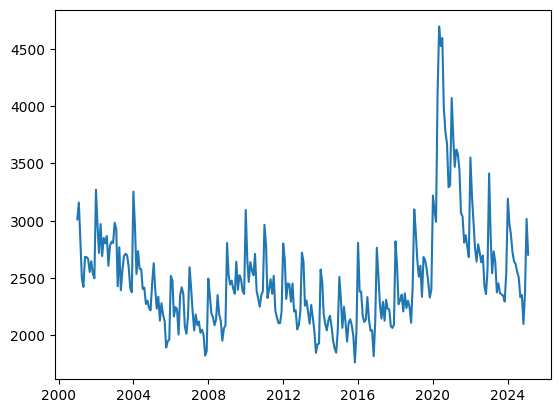

In [9]:
import matplotlib.pyplot as plt
plt.plot(df['YearMonth'], df['Población desocupada'])
plt.show()

In [ ]:
df['MonthNumber'] = [x.replace('*','') for x in df['Month']]
MONTHSDICT = {'Ene':'01', 'Feb':'02', 'Mar':'03', 'Abr':'04', 'May':'05', 'Jun':'06', 'Jul':'07', 'Ago':'08', 'Sep':'09',
                'Oct':'10', 'Nov':'11', 'Dic':'12'}
df['MonthNumber'] = df['MonthNumber'].map(MONTHSDICT)
df['YearMonth'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['MonthNumber'].astype(str), format='%Y-%m')

In [39]:
new_df = df.copy()
new_df = new_df.T
new_df.columns = new_df.iloc[0]
new_df = new_df.iloc[1:].copy()
new_df.reset_index(inplace = True, names='Year')
new_df['Year'] = pd.to_numeric(new_df['Year'], errors='coerce')
new_df['Year'] = new_df['Year'].ffill()
new_df['Year'] = new_df['Year'].astype(int)
new_df.dropna(axis=1, how='all', inplace = True)
new_df.rename(columns= {np.nan : 'Month'}, inplace = True)

In [40]:
new_df

Concepto,Year,Month,% población en edad de trabajar,Tasa Global de Participación (TGP),Tasa de Ocupación (TO),Tasa de Desocupación (TD),Tasa de Subocupación (TS),TCSD,TCDFTP,MCSFT,Población total,Población en edad de trabajar (PET),Fuerza de trabajo,Población ocupada,Población desocupada,Población fuera de la fuerza de trabajo,Población subocupada,Fuerza de trabajo potencial
0,2001,Ene,68.372188,69.053538,57.575237,16.622326,11.825744,28.448071,0,0,38378.406,26240.156,18119.756,15107.832,3011.925,8120.4,2142.796,0
1,2001,Feb,68.40037,68.948903,56.928209,17.434206,11.677268,29.111474,0,0,38419.624,26279.165,18119.196,14960.258,3158.938,8159.969,2115.827,0
2,2001,Mar,68.425957,68.387911,57.57446,15.811933,11.972872,27.784805,0,0,38456.836,26314.458,17995.908,15150.407,2845.501,8318.55,2154.627,0
3,2001,Abr,68.453948,65.224009,55.756693,14.515078,10.46648,24.981558,0,0,38498.053,26353.437,17188.768,14693.805,2494.963,9164.669,1799.059,0
4,2001,May,68.481856,65.406094,56.225804,14.035833,10.633666,24.669499,0,0,38538.005,26391.541,17261.676,14838.856,2422.82,9129.865,1835.549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2024,Oct,77.919249,63.905362,58.068399,9.13376,8.142949,17.276709,14.278952,21.960816,51701.515,40285.432,25744.551112,23393.105561,2351.44555,14540.880888,2096.365634,1545.252377
286,2024,Nov,77.944304,63.732815,58.526632,8.168763,7.483779,15.652542,12.841622,19.944587,51745.299,40332.513,25705.045895,23605.261493,2099.784401,14627.467105,1923.708744,1378.13538
287,2024,Dic,77.968249,64.373276,58.499024,9.125295,6.972549,16.097844,14.147315,20.734539,51787.628,40377.907,25992.581546,23620.681703,2371.899843,14385.325454,1812.345493,1520.456183
288,2025,Ene,77.992931,64.115859,56.655314,11.636037,7.68885,19.324886,17.490965,24.670358,51831.449,40424.866,25918.749953,22902.834711,3015.915242,14506.116047,1992.853766,1839.221882


In [35]:
new_df

Concepto,Year,NaN,% población en edad de trabajar,Tasa Global de Participación (TGP),Tasa de Ocupación (TO),Tasa de Desocupación (TD),Tasa de Subocupación (TS),TCSD,TCDFTP,MCSFT,NaN,Población total,Población en edad de trabajar (PET),Fuerza de trabajo,Población ocupada,Población desocupada,Población fuera de la fuerza de trabajo,Población subocupada,Fuerza de trabajo potencial
0,2001,Ene,68.372188,69.053538,57.575237,16.622326,11.825744,28.448071,0,0,NaN,38378.406,26240.156,18119.756,15107.832,3011.925,8120.4,2142.796,0
1,2001,Feb,68.40037,68.948903,56.928209,17.434206,11.677268,29.111474,0,0,NaN,38419.624,26279.165,18119.196,14960.258,3158.938,8159.969,2115.827,0
2,2001,Mar,68.425957,68.387911,57.57446,15.811933,11.972872,27.784805,0,0,NaN,38456.836,26314.458,17995.908,15150.407,2845.501,8318.55,2154.627,0
3,2001,Abr,68.453948,65.224009,55.756693,14.515078,10.46648,24.981558,0,0,NaN,38498.053,26353.437,17188.768,14693.805,2494.963,9164.669,1799.059,0
4,2001,May,68.481856,65.406094,56.225804,14.035833,10.633666,24.669499,0,0,NaN,38538.005,26391.541,17261.676,14838.856,2422.82,9129.865,1835.549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2024,Oct,77.919249,63.905362,58.068399,9.13376,8.142949,17.276709,14.278952,21.960816,NaN,51701.515,40285.432,25744.551112,23393.105561,2351.44555,14540.880888,2096.365634,1545.252377
286,2024,Nov,77.944304,63.732815,58.526632,8.168763,7.483779,15.652542,12.841622,19.944587,NaN,51745.299,40332.513,25705.045895,23605.261493,2099.784401,14627.467105,1923.708744,1378.13538
287,2024,Dic,77.968249,64.373276,58.499024,9.125295,6.972549,16.097844,14.147315,20.734539,NaN,51787.628,40377.907,25992.581546,23620.681703,2371.899843,14385.325454,1812.345493,1520.456183
288,2025,Ene,77.992931,64.115859,56.655314,11.636037,7.68885,19.324886,17.490965,24.670358,NaN,51831.449,40424.866,25918.749953,22902.834711,3015.915242,14506.116047,1992.853766,1839.221882
